In [ ]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

### **Package installer for chart studio**

In [ ]:
 !pip install chart_studio

### **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 

import seaborn as sns
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from io import BytesIO 
import seaborn as sns; sns.set()
import tensorflow
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D
from sklearn.metrics import cohen_kappa_score , matthews_corrcoef , classification_report , roc_auc_score , accuracy_score
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

Using TensorFlow backend.


### **Sample image from Covid Dataset**

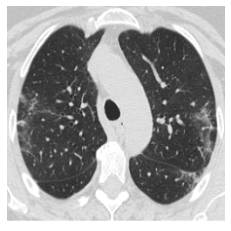

<class 'numpy.ndarray'>
(224, 224, 3)


In [4]:
img = plt.imread("/content/drive/My Drive/dataset_pr/COVID/Covid (1).png")
img = cv2.resize(img,(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()
print(type(img))
print(img.shape)

### **Labelling Images for binary classification**

In [5]:
x_ = list()
y = list()
IMG_SIZE = 224
c = 0
nc = 0
for i in os.listdir("/content/drive/My Drive/dataset_pr/COVID"):
    try:
        path = "/content/drive/My Drive/dataset_pr/COVID/"+i
        #print('1')
        img = cv2.imread(path)
        img_ = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        img_arr = np.asarray(img_)
        x_.append(img_arr)
        label = 0
        c = c+1
    except:
        None
for i in os.listdir("/content/drive/My Drive/dataset_pr/NON-COVID"):
    try:
        path = "/content/drive/My Drive/dataset_pr/NON-COVID/"+i
        img = cv2.imread(path)
        img_ = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        img_arr = np.asarray(img_)
        x_.append(img_arr)
        label = 1
        nc = nc+1
    except:
        None

In [120]:
x1=[]
from keras.preprocessing import image
for item in x_:
      if len(item.shape) > 2 and item.shape[2] == 4:
            item = cv2.cvtColor(item, cv2.COLOR_BGRA2BGR)
      x1.append(item)
Y = []
for i in range(1252):
    Y.append(1)

for i in range(1229):
    Y.append(0)
X = np.asarray(x1)
y = np.asarray(Y)
print(X.shape)

(2481, 224, 224, 3)


### **Split between train , test**

In [121]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X , y , test_size=0.10 , random_state=42)
X_train, x_val, y_train, y_val = train_test_split(X_train , y_train, test_size=0.10 , random_state=42)

### **Making Base Model**

In [43]:
base_model = NASNetMobile(include_top=False, weights='imagenet', input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

### **Function for performance parameters**

In [52]:
def print_performance_metrics(y_test, max_y_pred_test):
    print('Test Accuracy:', np.round(metrics.accuracy_score(y_test, max_y_pred_test),4))
    print('Precision:', np.round(metrics.precision_score(y_test, max_y_pred_test,average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test, max_y_pred_test , average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test, max_y_pred_test, average='weighted'),4))
    print('Cohen Kappa Score:',cohen_kappa_score(y_test, max_y_pred_test, labels=None, weights=None))
    print('Matthews Corrcoef:',matthews_corrcoef(y_test, max_y_pred_test))
    print('ROC AUC:',roc_auc_score(y_test,max_y_pred_test))
    print('\t\tClassification Report:\n', classification_report(y_test,max_y_pred_test))

### **Function for Confusion Matrix**

In [98]:
def print_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y_pred, y)
    cm_df = pd.DataFrame(cm , index = ['Covid','Non-Covid'],columns = ['Covid','Non-Covid'])
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



### **K-NN Classifier**

In [101]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7789
Validation Accuracy : 0.5848


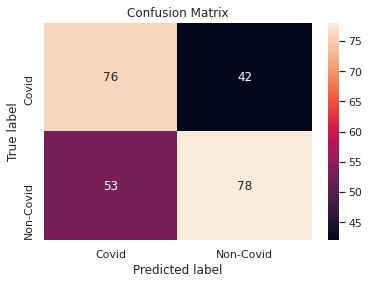

Test Accuracy: 0.6185
Precision: 0.6206
Recall: 0.6185
F1 Score: 0.6183
Cohen Kappa Score: 0.23838500917608418
Matthews Corrcoef: 0.23931740487309797
ROC AUC: 0.6195736434108526
		Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.62       129
           1       0.60      0.65      0.62       120

    accuracy                           0.62       249
   macro avg       0.62      0.62      0.62       249
weighted avg       0.62      0.62      0.62       249



In [102]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **ANN Classifier**

In [106]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.5782


Training Accuracy : 0.5971
Validation Accuracy : 0.5759


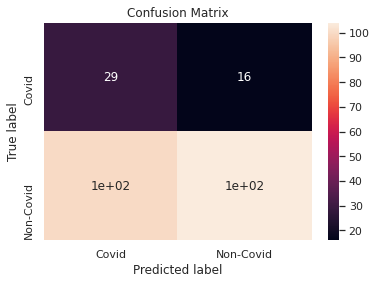

Test Accuracy: 0.5341
Precision: 0.5796
Recall: 0.5341
F1 Score: 0.4821
Cohen Kappa Score: 0.08929247067726065
Matthews Corrcoef: 0.1187835866481968
ROC AUC: 0.5457364341085271
		Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.22      0.33       129
           1       0.51      0.87      0.64       120

    accuracy                           0.53       249
   macro avg       0.58      0.55      0.49       249
weighted avg       0.58      0.53      0.48       249



In [107]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Decision Tree Classifier**

In [108]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.558


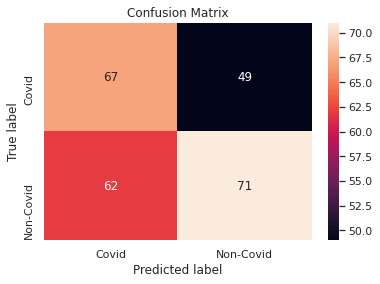

Test Accuracy: 0.5542
Precision: 0.5565
Recall: 0.5542
F1 Score: 0.5538
Cohen Kappa Score: 0.11062843903851727
Matthews Corrcoef: 0.11123349507115017
ROC AUC: 0.5555232558139536
		Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.52      0.55       129
           1       0.53      0.59      0.56       120

    accuracy                           0.55       249
   macro avg       0.56      0.56      0.55       249
weighted avg       0.56      0.55      0.55       249



In [110]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **SVM Classiier**

In [111]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.5911
Validation Accuracy : 0.5804


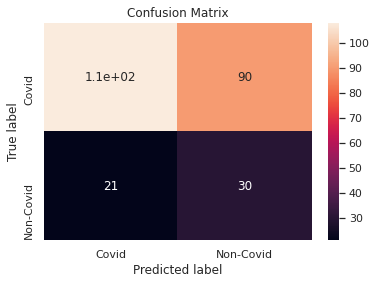

Test Accuracy: 0.5542
Precision: 0.5661
Recall: 0.5542
F1 Score: 0.5113
Cohen Kappa Score: 0.08899436369029967
Matthews Corrcoef: 0.10797683842894185
ROC AUC: 0.5436046511627907
		Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.84      0.66       129
           1       0.59      0.25      0.35       120

    accuracy                           0.55       249
   macro avg       0.57      0.54      0.51       249
weighted avg       0.57      0.55      0.51       249



In [112]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Random Forest Classifier**

In [113]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.6473


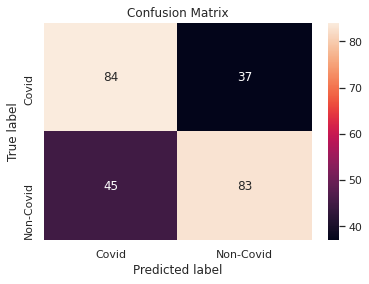

Test Accuracy: 0.6707
Precision: 0.6722
Recall: 0.6707
F1 Score: 0.6707
Cohen Kappa Score: 0.34203402938901784
Matthews Corrcoef: 0.34274090526229195
ROC AUC: 0.6714147286821706
		Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       129
           1       0.65      0.69      0.67       120

    accuracy                           0.67       249
   macro avg       0.67      0.67      0.67       249
weighted avg       0.67      0.67      0.67       249



In [114]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)


### **XG Boost Classifier**

In [115]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.7709
Validation Accuracy : 0.6741


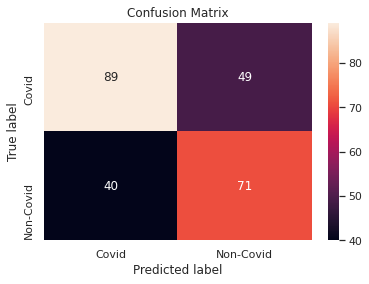

Test Accuracy: 0.6426
Precision: 0.6424
Recall: 0.6426
F1 Score: 0.6416
Cohen Kappa Score: 0.2823277955892355
Matthews Corrcoef: 0.2830742453835767
ROC AUC: 0.6407945736434109
		Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.69      0.67       129
           1       0.64      0.59      0.61       120

    accuracy                           0.64       249
   macro avg       0.64      0.64      0.64       249
weighted avg       0.64      0.64      0.64       249



In [116]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **AdaBoost Classifier**

In [117]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.7022
Validation Accuracy : 0.6116


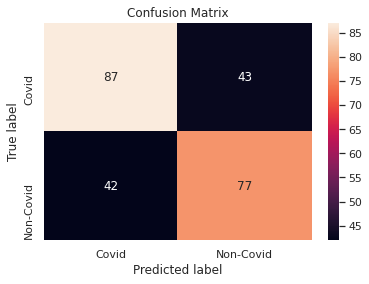

Test Accuracy: 0.6586
Precision: 0.6585
Recall: 0.6586
F1 Score: 0.6586
Cohen Kappa Score: 0.316177183289716
Matthews Corrcoef: 0.3161874155348495
ROC AUC: 0.6580426356589147
		Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67       129
           1       0.65      0.64      0.64       120

    accuracy                           0.66       249
   macro avg       0.66      0.66      0.66       249
weighted avg       0.66      0.66      0.66       249



In [119]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)